In [69]:
import pandas as pd
from prophet import Prophet
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import os


def format_pubs_by_month(keyword, data_folder):

    # Construct the filepath safely
    filename = f"{keyword.replace(" ", "")}_arXiv_scrape.csv"
    directory = f"./Data/{data_folder}"
    filepath = os.path.join(directory, filename)

    #print(f"Filepath is: {filepath}")

    raw_df = pd.read_csv(filepath)

    #Format df to date-time
    raw_df['dates'] = pd.to_datetime(raw_df['dates'])
    raw_df = raw_df.sort_values(by='dates')
    raw_df['year_month'] = raw_df['dates'].dt.to_period('M').astype(str)
    raw_df['year_month'] = pd.to_datetime(raw_df['year_month'])

    #Monthly counts fitted to year-month
    monthly_counts = raw_df.groupby('year_month').size().reset_index(name='publications_per_month')
    #monthly_counts['avg_publications_per_month'] = monthly_counts['publications_per_month'].rolling(window=1, min_periods=1).mean()

    raw_df = raw_df.merge(monthly_counts, on='year_month', how='left')

    #Group-by / summarize counts by month
    time_series_df = raw_df[["year_month", "publications_per_month"]].groupby('year_month', as_index=False).first()
    time_series_df["keyword"] = keyword
    #print(time_series_df)
    return time_series_df




#sns.lineplot(x = "year_month", y="publications_per_month", 
             #data = format_pubs_by_month("./Data/Survival Analysis/Censoring_arXiv_scrape.csv"))




In [66]:
keyword_list = ['Survival Analysis', 'Time-to-Event', 'Cox Proportional Hazards', 'Kaplan-Meier', 'Accelerated Failure Time', 
                'Competing Risks', 'Frailty Models', 'Hazard Function', 'Censoring', 'Hazard Ratio', 'Parametric Survival Models', 
                'Cure Models', 'Left Truncation', 'Interval Censoring', 'Recurrent Events']

df_list = []
#Merge dataframes
for keyword in keyword_list:
    df_list.append(format_pubs_by_month(keyword))

merged_time_series_df = pd.concat(df_list, ignore_index=True)


TypeError: format_pubs_by_month() missing 1 required positional argument: 'data_folder'

<Axes: xlabel='year_month', ylabel='publications_per_month'>

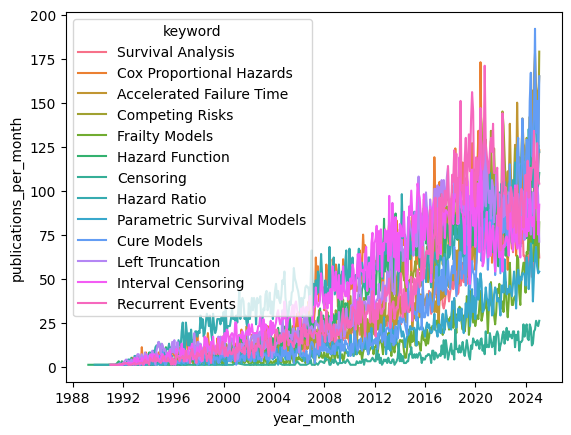

In [ ]:
sns.lineplot(x = "year_month", y="publications_per_month", hue="keyword",
             data = merged_time_series_df)

15:56:41 - cmdstanpy - INFO - Chain [1] start processing
15:56:41 - cmdstanpy - INFO - Chain [1] done processing
15:56:41 - cmdstanpy - INFO - Chain [1] start processing
15:56:41 - cmdstanpy - INFO - Chain [1] done processing


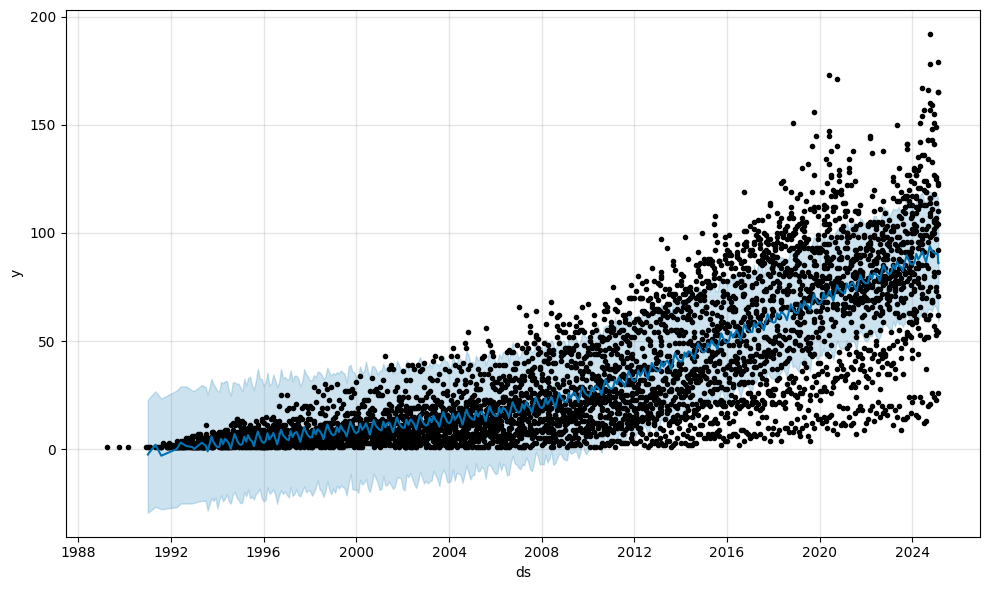

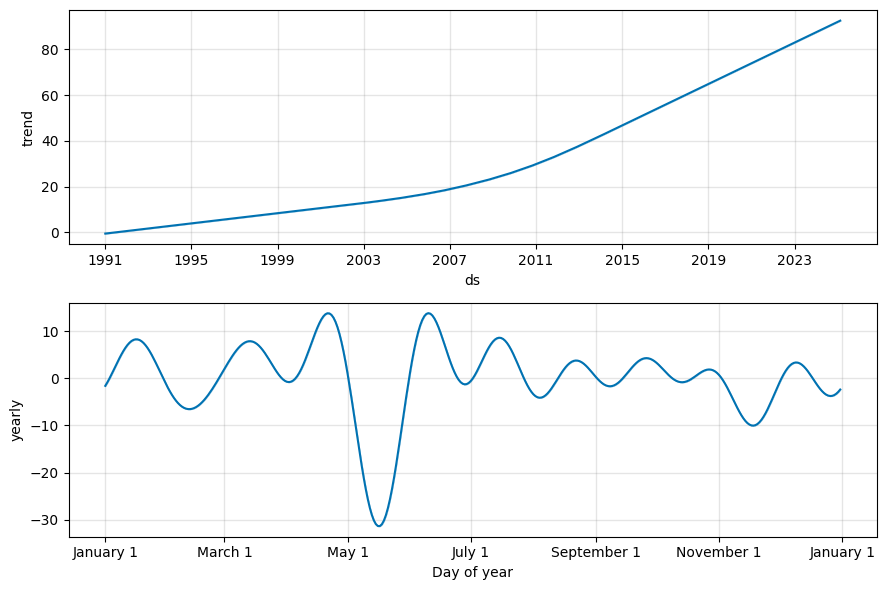

In [ ]:
'''Survival Analysis Example'''

hazard_function_df = format_pubs_by_month(keyword)[["year_month", "publications_per_month"]]
hazard_function_prophet_df = hazard_function_df.rename(columns={'year_month': 'ds', 'publications_per_month': 'y'})

merged_prophet_df = merged_time_series_df[["year_month", "publications_per_month"]].rename(columns={'year_month': 'ds', 'publications_per_month': 'y'})

#print(hazard_function_df)

hazard_function = Prophet()
hazard_function.fit(hazard_function_prophet_df)

merged = Prophet()
merged.fit(merged_prophet_df)

# future_hazard = hazard_function.make_future_dataframe(periods=12)
# future_hazard.tail()
# forecast_hazard = hazard_function.predict(future)
# forecast_hazard[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# fig1 = hazard_function.plot(forecast_hazard)

future_all = merged.make_future_dataframe(periods=12)
future_all.tail()
forecast_all = merged.predict(future)
forecast_all[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = merged.plot(forecast_all)
fig2 = merged.plot_components(forecast_all)



17:03:34 - cmdstanpy - INFO - Chain [1] start processing
17:03:34 - cmdstanpy - INFO - Chain [1] done processing
17:03:34 - cmdstanpy - INFO - Chain [1] start processing
17:03:34 - cmdstanpy - INFO - Chain [1] done processing


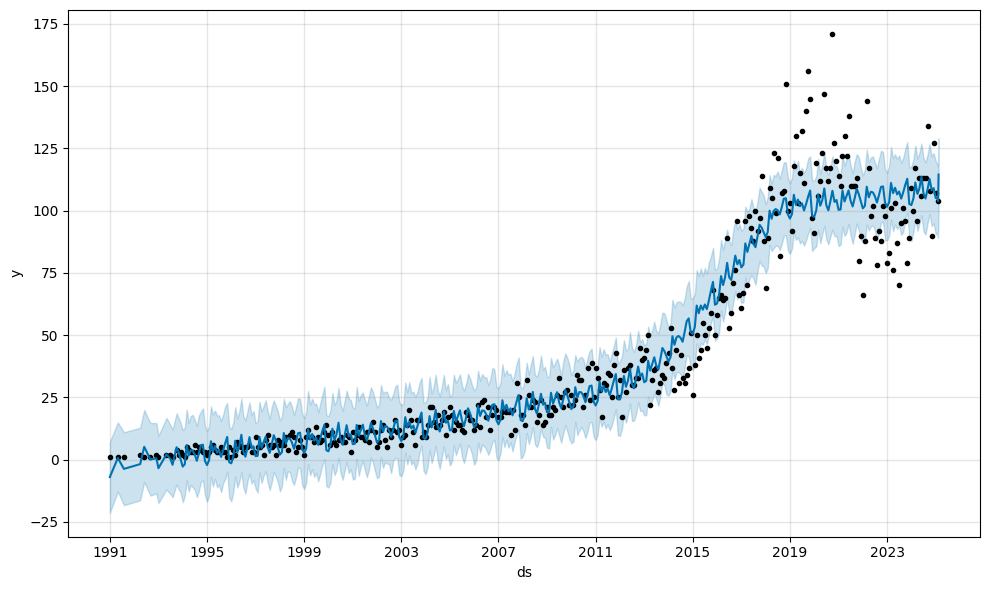

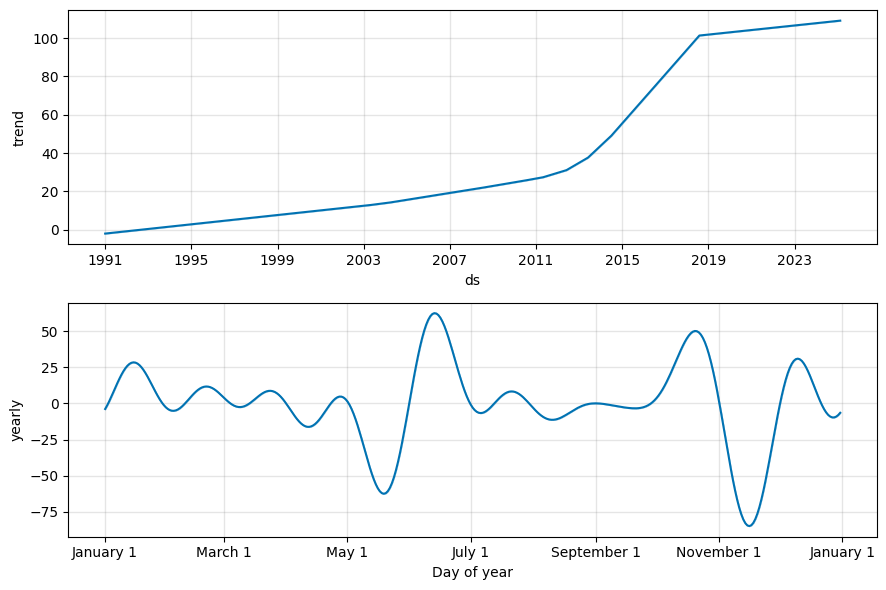

In [73]:
keyword_list = ['MapReduce Optimization', 'Hadoop Performance Tuning', 'Distributed File Systems', 'Parallel Data Processing', 
                'Fault-Tolerant Computing', 'Scalability in Big Data Systems', 'Batch Processing Frameworks', 
                'Cloud-Based Distributed Computing', 'Data Shuffling and Partitioning', 'Energy Efficient Computing in Clusters']

df_list = []

#Merge dataframes
for keyword in keyword_list:
    df_list.append(format_pubs_by_month(keyword, "Distributed Computing"))

merged_time_series_df = pd.concat(df_list, ignore_index=True)

keyword = 'MapReduce Optimization'
map_reduce_df = format_pubs_by_month(keyword, "Distributed Computing")[["year_month", "publications_per_month"]]
map_reduce_prophet_df = hazard_function_df.rename(columns={'year_month': 'ds', 'publications_per_month': 'y'})

merged_prophet_df = merged_time_series_df[["year_month", "publications_per_month"]].rename(columns={'year_month': 'ds', 'publications_per_month': 'y'})

map_reduce = Prophet()
map_reduce.fit(map_reduce_prophet_df)

merged = Prophet()
merged.fit(merged_prophet_df)

# future_hazard = hazard_function.make_future_dataframe(periods=12)
# future_hazard.tail()
# forecast_hazard = hazard_function.predict(future)
# forecast_hazard[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# fig1 = hazard_function.plot(forecast_hazard)

future_all = map_reduce.make_future_dataframe(periods=12)
future_all.tail()
forecast_all = map_reduce.predict(future)
forecast_all[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = map_reduce.plot(forecast_all)
fig2 = map_reduce.plot_components(forecast_all)


Example with Pubmed Data